# Classificação de Vidros

Esta base de dados é de origem do Kaggle (disponível em: https://www.kaggle.com/uciml/glass). Este trabalho faz a exploração dos dados para obter *insights*, analisa e treina modelos de *Machine Learning* (ML); e faz a avaliação dos modelos. Este *Jupyter Notebook* está dividido nos seguintes tópicos:

1. Análise Exploratória dos Dados (EDA)
2. Visualização de Dados
3. Pré processamento
4. Modelo de *Machine Learning*
5. Avaliação dos Modelos
6. Considerações Finais

### Importando bibliotecas

In [1]:
#data manipulation
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#set color grid to pictures
sns.set_style('darkgrid')

#Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix



#Reading data
file_path = './data/glass.csv'
df = pd.read_csv(file_path)

## 1. Análise Exploratória dos Dados

É possível observar que os dados são unicamente numéricos.

In [2]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


A base de dados possui 214 entradas e 10 colunas. Todos os atributos são números flutuantes, a coluna 'Type' é do tipo inteiro e não existem campos vazios, como mostra abaixo *non-null* para todos os atributos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Mostrar as colunas
print('Colunas: {}'.format(df.columns.values))

#Mostrar a quantidade de amostras de cada classe
print('Classes: {}'.format(df['Type'].unique()))

Colunas: ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
Classes: [1 2 3 5 6 7]


A base de dados possui 10 colunas, sendo as 9 primeiras as features e a última o tipo de vidro. Cada feature significa:
* RI - Índice de Fefração
* Na - Sódio (unidade de medida: peso percentual no óxido correspondente, como o restante das features)
* Mg - Magnésio
* Al - Alumínio
* Si -Silício
* K - Potássio
* Ca - Cálcio
* Ba - Bário
* Fe - Ferro

As classes correspondem de 1 a 7 para cada tipo de vidro, tal que:
* 1 - construção de janelas flutuante processado
* 2 - building_windows_non_float_processed 
* 3 - vehicle_windows_float_processed 
* 4 - vehicle_windows_non_float_processed
* 5 - containers 
* 6 - tableware 
* 7 - headlamps

Percebe-se que na saída do código acima, em "Classes", não há o tipo 4. Isto é, não existe amostra para a classe 4.

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 2. Visualização de Dados

Primeiramente, vamos investigar a quantidade de vidros por tipo:

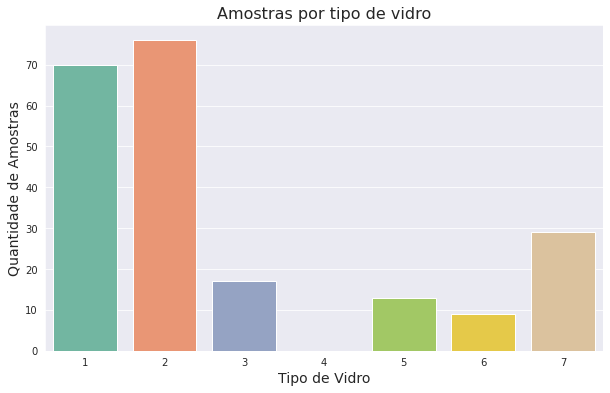

In [6]:
plt.figure(figsize=(10,6))
plt.title('Amostras por tipo de vidro', fontsize=16)
sns.countplot(x='Type',data=df, order=[1,2,3,4,5,6,7],palette='Set2')
plt.xlabel('Tipo de Vidro', fontsize=14)
plt.ylabel('Quantidade de Amostras', fontsize=14)
plt.savefig('./figures/amostras.png')

É perceptível que as classes 1 e 2 possuem mais amostras. Além disso, não existe amostra para a classe 4. Por haver quantidades diferentes de vidro por classe é preciso ter cuidado para modelar e pesar classes desbalanceadas.

Agora queremos investigar se há alguma correlação entre os elementos químicos na composição do vidro. Para isto, foi criada uma matriz de correlação que consiste em calcular em termos percentuais a taxa de correlação linear entre duas variáveis. Para melhor visualização dessa matriz, vamos visualizá-la em um mapa de calor:

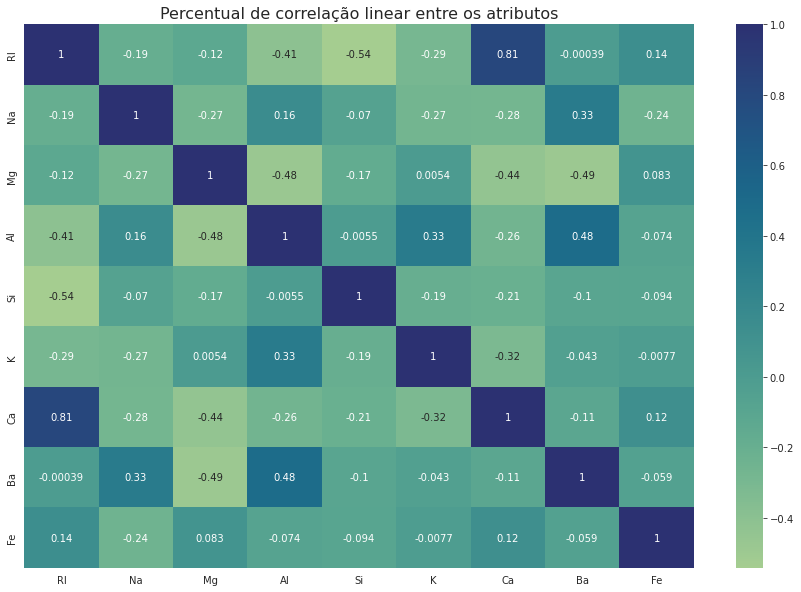

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('Type',axis=1).corr(), annot=True, cmap='crest')
plt.title('Percentual de correlação linear entre os atributos', fontsize=16)
plt.savefig('./figures/corr_matrix.png')

Pode-se perceber que os elementos mais escuros possuem maior correlação, os mais claros correlação inversa e os intermediários possuem pouca correlação linear. Por exemplo, a maior correlação de atributos são o Índice de Refração (RI) e o elemento Cálcio (Ca) de valor 0.81. Por outro lado, o Índice de Refração (RI) e o Silício (Si) possui o valor mais negativo de -0.51, sugerindo uma correlação inversa.

Vamos olhar mais de perto essas duas correlações citadas:

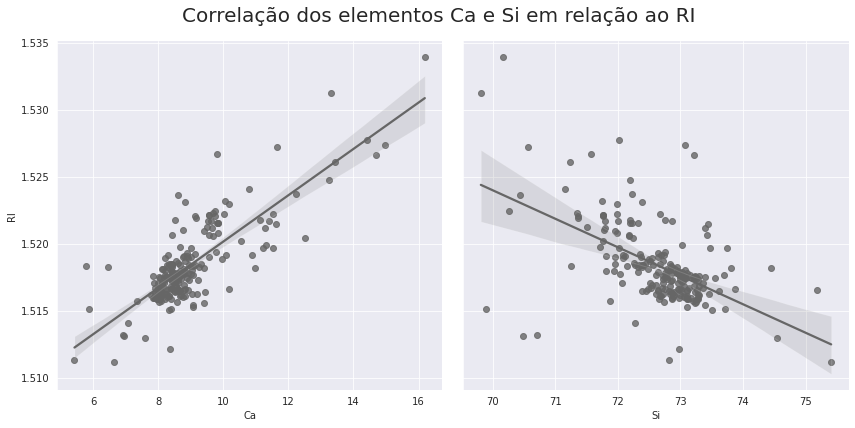

In [8]:
g = sns.PairGrid(df, y_vars=["RI"], x_vars=["Ca", "Si"], height=6, palette='crest')
g.map(sns.regplot, color=".4")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlação dos elementos Ca e Si em relação ao RI', fontsize=20)
plt.savefig('./figures/elementos_corr.png')

De fato, para o primeiro exemplo entre Ca e RI a tendência linear é de aumento entre as duas variáveis, ao passo que, o segundo exemplo entre Si e RI é de tendência linear negativa entre as duas variáveis.

## 3. Pré processamento

Como vamos trabalhar com alguns algoritmos de ML lineares é preciso que estes dados sejam preprocessados. Para isto vamos utilizar StandScaler para esta tarefa e utilizar o X_scaled para os algoritmos de ML que precisarem mesmo. Para árvores de decisão isto não será necessário.

Além disso, vamos separar os dados de treinamento e teste. Os dados de teste serão salvos em X_test e y_test. Os dados de treinamento em X_train e y_train e estes serão usados para treinar e testar os algoritmos durante o treinamento. Ao final de tudo, e apenas no final, verificamos todos os modelos com os dados jamais vistos, X_test e y_test.

In [9]:
# Dados originais
X = df.drop(labels='Type',axis=1)
y = df['Type']

# Separando os dados de teste final
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)

# Dados escalados no X_scaled
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

# Dados utilizados durante o treinamento dos modelos sem scaled
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3, random_state=101)

# Dados utilizados durante o treinamento dos modelos standardScaler
X_train_scaled_val = scaler.transform(X_train_val)
X_test_scaled_val = scaler.transform(X_test_val)

print(f'Tamanho dos dados de treinamento: {len(X_train)}')

Tamanho dos dados de treinamento: 149


## 4. Treinamento de Modelos de Machine Learning

### 4.1 Decision Trees

Primeiro vamos utilizar uma árvore de decisão e avaliar suas características. Como a base de dados é pequena, vamos procurar os melhores parâmetros que generalizem a classificação (queremos evitar o overfitting e underfitting). Para isto, vamos testar a profundidade da árvore e comparar o *score* do treino e do teste.

In [10]:
param_grid = [2, 4, 5, 6, 8]
dt_depth = {'two': 0, 'four': 1, 'five': 2, 'six': 3, 'eight': 4}
dt_classifiers = []

for max_depth in param_grid:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=101)
    clf.fit(X_train_val, y_train_val)
    print(f'DecisionTree - max_depth={max_depth} | train_score={clf.score(X_train_val, y_train_val):.2f} | \
test_score={clf.score(X_test_val, y_test_val):.2f}')
    
    dt_classifiers.append(clf)

DecisionTree - max_depth=2 | train_score=0.54 | test_score=0.51
DecisionTree - max_depth=4 | train_score=0.81 | test_score=0.62
DecisionTree - max_depth=5 | train_score=0.88 | test_score=0.67
DecisionTree - max_depth=6 | train_score=0.94 | test_score=0.67
DecisionTree - max_depth=8 | train_score=1.00 | test_score=0.64


Temos diferentes *scores* em cada árvore de decisão. As árvores mais promissoras são as de profundidade 4 e 5 pois foram bem no treinamento e razoavelmente bem no teste.

A primeira árvore ficou próximo a 50% e já está descartada. As árvores de profundidade 7 e 8 decoraram os dados e tiveram baixa performance no teste, logo houve overfitting.

Para decidir entre profundidade 4 e 5, vamos realizar a validação cruzada nos mesmos dados.

#### Decision Tree - Validação Cruzada

Pela validação cruzada, o modelo de profundidade 5 obteve pelo menos 60% de acurácia dos treinamentos. Logo, é o modelo de árvore de decisão que vamos escolher.

In [21]:
#choosing classifier depth 5
dt_clf = dt_classifiers[dt_depth['five']]
dt_val_score = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring='accuracy')
dt_score = min(dt_val_score)
print(f'Decision Tree Cross_val_score completo: {dt_val_score}')
print(f'Decision Tree menor Cross_val_score: {dt_score:.2f}')

Decision Tree Cross_val_score completo: [0.72       0.6        0.63265306]
Decision Tree menor Cross_val_score: 0.60


A Decision Tree teve 60% de acurácia no pior dos casos na validação cruzada com 3 folders.

### 4.3 Random Forest

In [12]:
#test parameters
n_estimators = [3, 5, 7, 10, 50]
rf_classifiers = []

for estimator in n_estimators:
    clf = RandomForestClassifier(n_estimators=estimator, max_depth=10, random_state=101)
    clf.fit(X_train_val, y_train_val)
    
    print(f'RandomForest n_estimators={estimator} | train_score={clf.score(X_train_val, y_train_val):.2f} | \
test_score={clf.score(X_test_val, y_test_val):.2f}')
    
    rf_classifiers.append(clf)

RandomForest n_estimators=3 | train_score=0.93 | test_score=0.73
RandomForest n_estimators=5 | train_score=0.97 | test_score=0.76
RandomForest n_estimators=7 | train_score=0.96 | test_score=0.73
RandomForest n_estimators=10 | train_score=0.99 | test_score=0.80
RandomForest n_estimators=50 | train_score=1.00 | test_score=0.78


Dados os modelos treinados acima, foi escolhido o n_estimators=10 pois foi muito bem no treinamento e razoavelmente bem no teste. Embora no teste tenha caído bastante a acurácia. Agora, vamos realizar a validação cruzada e verificar sua acurácia.

In [22]:
# n_estimators=10
rf_clf = rf_classifiers[3]
rf_val_score = cross_val_score(rf_clf,X_train, y_train, cv=3, scoring='accuracy')
rf_score = min(rf_val_score)
print(f'Random Forest Cross_val_score completo: {rf_val_score}')
print(f'Random Forest menor Cross_val_score: {rf_score:.2f}')

Random Forest Cross_val_score completo: [0.72       0.72       0.71428571]
Random Forest menor Cross_val_score: 0.71


A Random Forest teve 71% de acurácia no pior dos casos na validação cruzada.

### 4.2 Regressão Logística

Para o Logistic Regression, vamos testar algums parâmetros de C, que é um hyperparâmetro de regularização.

In [14]:
from sklearn.linear_model import LogisticRegression

#Test parameters
C = [0.1, 1, 10, 100, 500]
lr_classifiers = []

for c in C:
    clf = LogisticRegression(C=c, random_state=101, max_iter=10000)
    clf.fit(X_train_scaled_val, y_train_val)
    
    print('Logistic Regression C={} | train_score={} | test_score={}'.format(c, clf.score(X_train_scaled_val, y_train_val) \
                                                                        ,clf.score(X_test_scaled_val, y_test_val)))
    lr_classifiers.append(clf)

Logistic Regression C=0.1 | train_score=0.6442307692307693 | test_score=0.4666666666666667
Logistic Regression C=1 | train_score=0.7596153846153846 | test_score=0.5555555555555556
Logistic Regression C=10 | train_score=0.7403846153846154 | test_score=0.5777777777777777
Logistic Regression C=100 | train_score=0.7596153846153846 | test_score=0.5777777777777777
Logistic Regression C=500 | train_score=0.75 | test_score=0.6


Entre os diferentes valores de C para o Logistic Regression e percebe-se que menor regularização melhora o score no treinamento e no teste. Vamos escolher o maior valor de C e realizar a validação cruzada.

#### Validação cruzada

In [23]:
#Choose LogisticRegression
lr_clf =lr_classifiers[4]
lr_val_score = cross_val_score(lr_clf, X_train_scaled_val, y_train_val, cv=3, scoring='accuracy')
lr_score = min(lr_val_score)
print(f'Logitic Regression Cross_val_score completo: {lr_val_score}')
print(f'Logistic Regression menor Cross_val_score: {lr_score:.2f}')

Logitic Regression Cross_val_score completo: [0.62857143 0.51428571 0.58823529]
Logistic Regression menor Cross_val_score: 0.51


Na validação cruzada o modelo C=500 teve acurácia de 51% no pior caso.

## 5. Avaliação dos modelos

Temos 3 modelos em mãos: Vamos avaliar a acurácia dos modelos e a matriz de confusão dos 2 melhores.

#### Acurácia

A acurácia dos modelos no teste foi:

In [24]:
dt_test_score = dt_clf.score(X_test, y_test)
rf_test_score = rf_clf.score(X_test, y_test)
lr_test_score = lr_clf.score(scaler.transform(X_test), y_test)

print(f'Decision Tree no teste: {dt_test_score:.2f}')
print(f'Random Forest no teste: {rf_test_score:.2f}')
print(f'Logistic Regression no teste: {lr_test_score:.2f}')

Decision Tree no teste: 0.68
Random Forest no teste: 0.72
Logistic Regression no teste: 0.58


Para visualizar melhor os modelos, vamos montar a Figura que compara a acurácia dos modelos no treinamento e no teste:

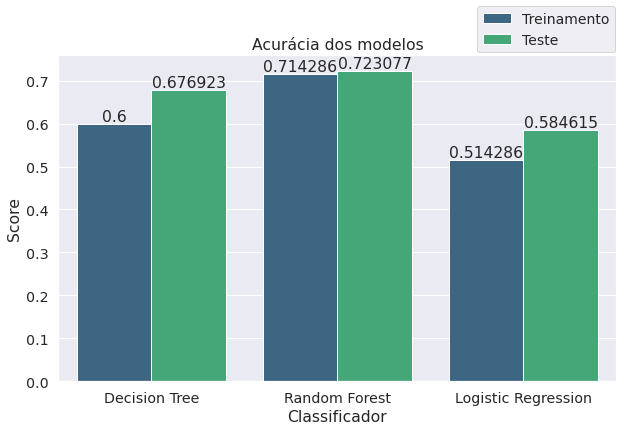

In [17]:
# Criando um dataframe com o resultado dos modelos
columns= ['Classificador', 'Tipo de Avaliação', 'Score']
list_ = [['Decision Tree', 'Treinamento', dt_score],
         ['Decision Tree', 'Teste', dt_test_score],
         ['Random Forest', 'Treinamento', rf_score],
         ['Random Forest', 'Teste', rf_test_score],
         ['Logistic Regression', 'Treinamento', lr_score],
         ['Logistic Regression', 'Teste', lr_test_score],
        ]
dataframe_models = pd.DataFrame(list_, columns=columns)

# Montando Figura no seaborn
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
ax = sns.barplot(data=dataframe_models, x='Classificador', y='Score', hue='Tipo de Avaliação', palette='viridis',)
plt.legend(bbox_to_anchor=(0.75, 1.15), loc=2, borderaxespad=0., fontsize=14)
plt.title('Acurácia dos modelos')
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('./figures/acuracia_modelos.png')

De fato, o Random Forest foi o que teve melhor resultado tanto no treinamento quanto para os dados não-vistos, o teste. Em seguida, tivemos a Decision Tree e por último o Logistic Regression. Agora, vamos avaliar a matriz de confusão da Random Forest e Decision Tree a seguir.

#### Matriz de Confusão - Decision Tree

<AxesSubplot:title={'center':'Taxa de predição por classe'}>

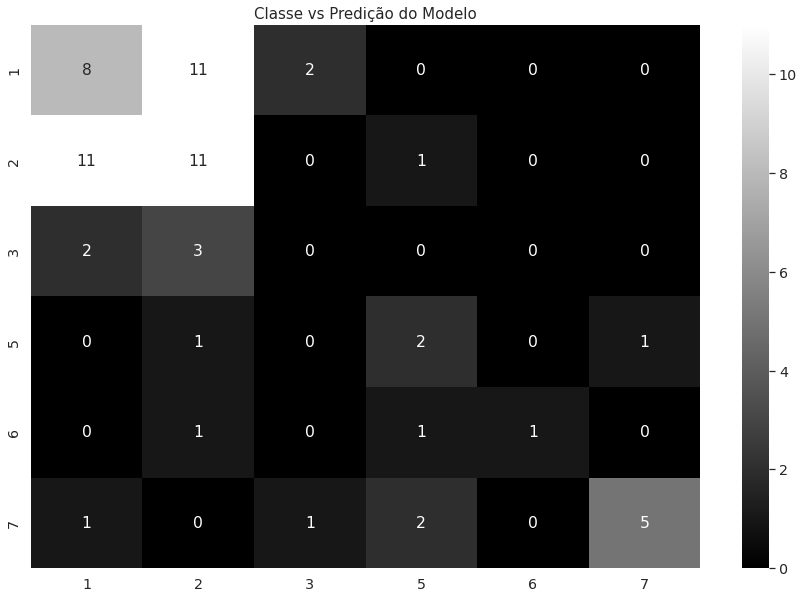

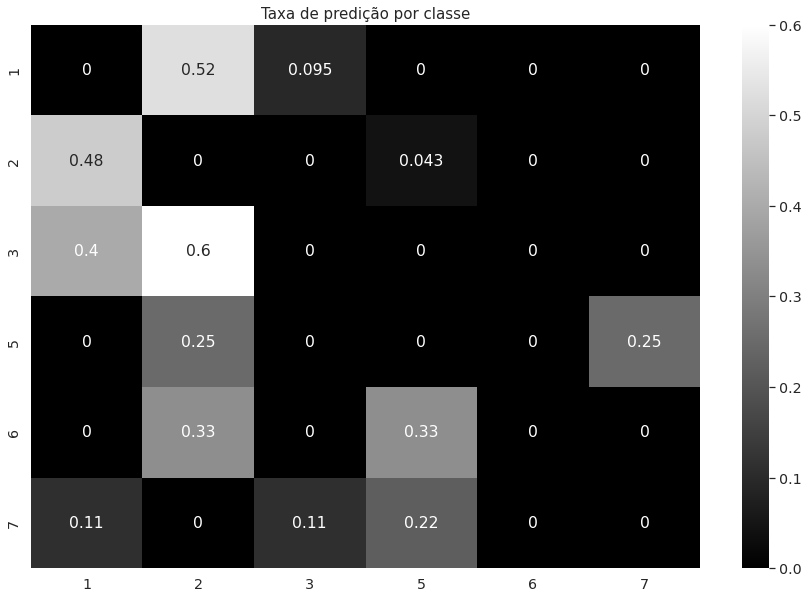

In [18]:
# predições do modelo
y_test_pred = cross_val_predict(dt_clf, X_test, y_test, cv=3)

# matriz de confusão: valores das classes vs predições do modelo
conf_mx_dt = confusion_matrix(y_test, y_test_pred)

# Criando figura da matriz de confusão para melhor visualização
labels = [1, 2, 3, 5, 6, 7]
plt.figure(figsize=(15,10))
plt.title('Classe vs Predição do Modelo', fontsize=15)
sns.heatmap(conf_mx_dt, annot=True, xticklabels=labels, yticklabels=labels, cmap='gray')

# Criando matriz de erros para melhor visualização
row_sums = conf_mx_dt.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_dt / row_sums
np.fill_diagonal(norm_conf_mx, 0)
labels = [1, 2, 3, 5, 6, 7]
plt.figure(figsize=(15,10))
plt.title('Taxa de predição por classe', fontsize=15)
sns.heatmap(norm_conf_mx, annot=True, xticklabels=labels, yticklabels=labels, cmap='gray')

A primeira Figura ilustrada é a matriz de confusão, em que as linhas representam as classes reais e as colunas a predição do modelo. A segunda Figura ilustrada é uma matriz que calcula a porcentagem de classificação errado por classe.

Na primeira figura percebemos que o modelo erra todas as predições para a classe 3. Além disso, há muito erro entre as predições da classe 1 e 2.

A partir da segunda Figura, percebemos que as duas primeiras colunas estão com cores mais claras. Isto significa que o modelo "chutou" por mais vezes suas predições para as classes 1 e 2.


#### Matriz de Confusão - Random Forest

<AxesSubplot:title={'center':'Taxa de predição por classe'}>

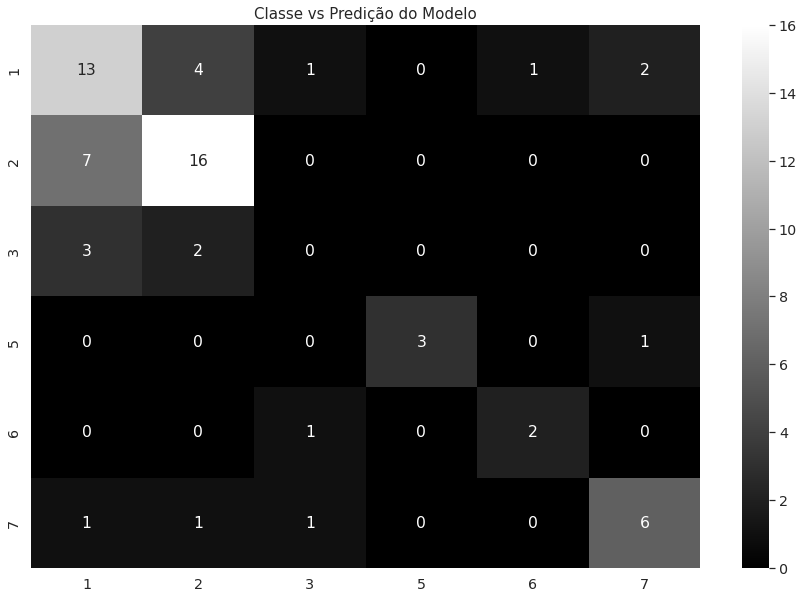

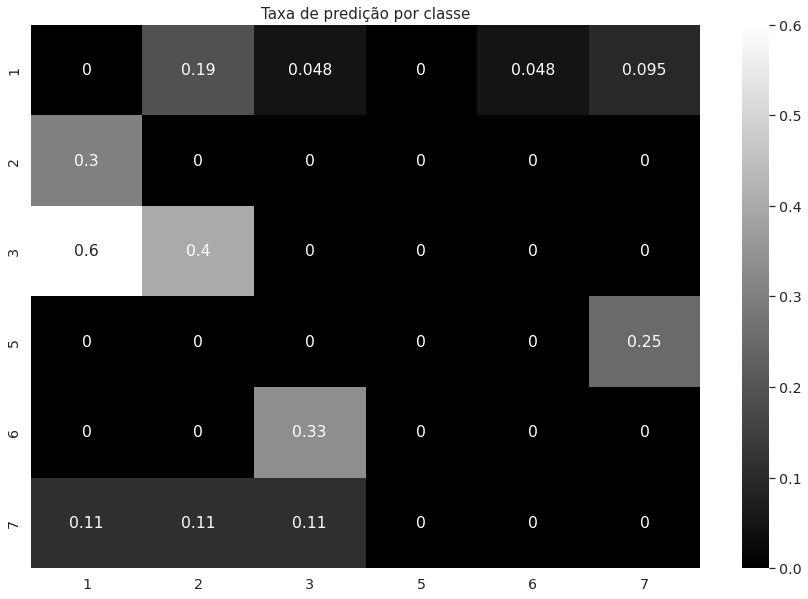

In [19]:
# predições do modelo
y_test_pred = cross_val_predict(rf_clf, X_test, y_test, cv=3)

# matriz de confusão: valores das classes vs predições do modelo
conf_mx_dt = confusion_matrix(y_test, y_test_pred)

# Criando figura da matriz de confusão para melhor visualização
labels = [1, 2, 3, 5, 6, 7]
plt.figure(figsize=(15,10))
plt.title('Classe vs Predição do Modelo', fontsize=15)
sns.heatmap(conf_mx_dt, annot=True, xticklabels=labels, yticklabels=labels, cmap='gray')

row_sums = conf_mx_dt.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_dt / row_sums
np.fill_diagonal(norm_conf_mx, 0)
labels = [1, 2, 3, 5, 6, 7]
plt.figure(figsize=(15,10))
plt.title('Taxa de predição por classe', fontsize=15)
sns.heatmap(norm_conf_mx, annot=True, xticklabels=labels, yticklabels=labels, cmap='gray')

Similarmente, na primeira figura percebemos que o modelo erra todas as predições para a classe 3. Contudo, há menos erro na classificação das classes 1 e 2.

A partir da segunda Figura, percebemos que o modelo "achou" que as amostras da classe 3 pertenciam à classe 1 ou 2. Para as outras classes, o erro também foi menor se comparado a Decision Tree.

## 6. Considerações Finais


### Decision Tree
    * Acurácia de 60% no treinamento;
    * Acurácia de 67% no teste;
    * Não foi capaz de classificar corretamente amostras da classe 3 no teste final;
    * Teve muitos erros de predição, "chutou" a classe 1 ou 2 para as amostras de outras classes.
    
### Ranfom Forest
    * Acurácia de 71% no treinamento;
    * Acurácia de 72% no teste final;
    * Também não foi capaz de classificar corretamente amostras da classe 3 no teste final;
    * Teve menos erros de predição para outras classes comparado-a à Decision Tree.

### Logistic Regression
    * Acurácia de 51% no treinamento;
    * Acurácia de 57% no teste;

#### Salvando Modelos no Disco

In [20]:
import joblib

joblib.dump(rf_clf, './models/Random_Forest.joblib')

['./models/Random_Forest.joblib']